In [5]:
from numpy.random import seed
import cv2
from sklearn.model_selection import train_test_split
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [7]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        print(label," is ready to load")
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [21]:
os.listdir("/Users/DaynoJa/Desktop/ASLData/asl_alphabet_train/asl_alphabet_train")

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [8]:
import keras
train_dir = "/Users/DaynoJa/Desktop/ASLData/asl_alphabet_train/asl_alphabet_train"

uniq_labels = sorted(os.listdir(train_dir))
#print(uniq_labels)
images, labels = load_images(directory = train_dir)
print("Data has been loaded")

A  is ready to load
B  is ready to load
C  is ready to load
D  is ready to load
E  is ready to load
F  is ready to load
G  is ready to load
H  is ready to load
I  is ready to load
J  is ready to load
K  is ready to load
L  is ready to load
M  is ready to load
N  is ready to load
O  is ready to load
P  is ready to load
Q  is ready to load
R  is ready to load
S  is ready to load
T  is ready to load
U  is ready to load
V  is ready to load
W  is ready to load
X  is ready to load
Y  is ready to load
Z  is ready to load
del  is ready to load
nothing  is ready to load
space  is ready to load
Data has been loaded


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

Total number of symbols:  29
Number of training images:  69600
Number of testing images:  17400


In [10]:
import mlflow

In [11]:
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


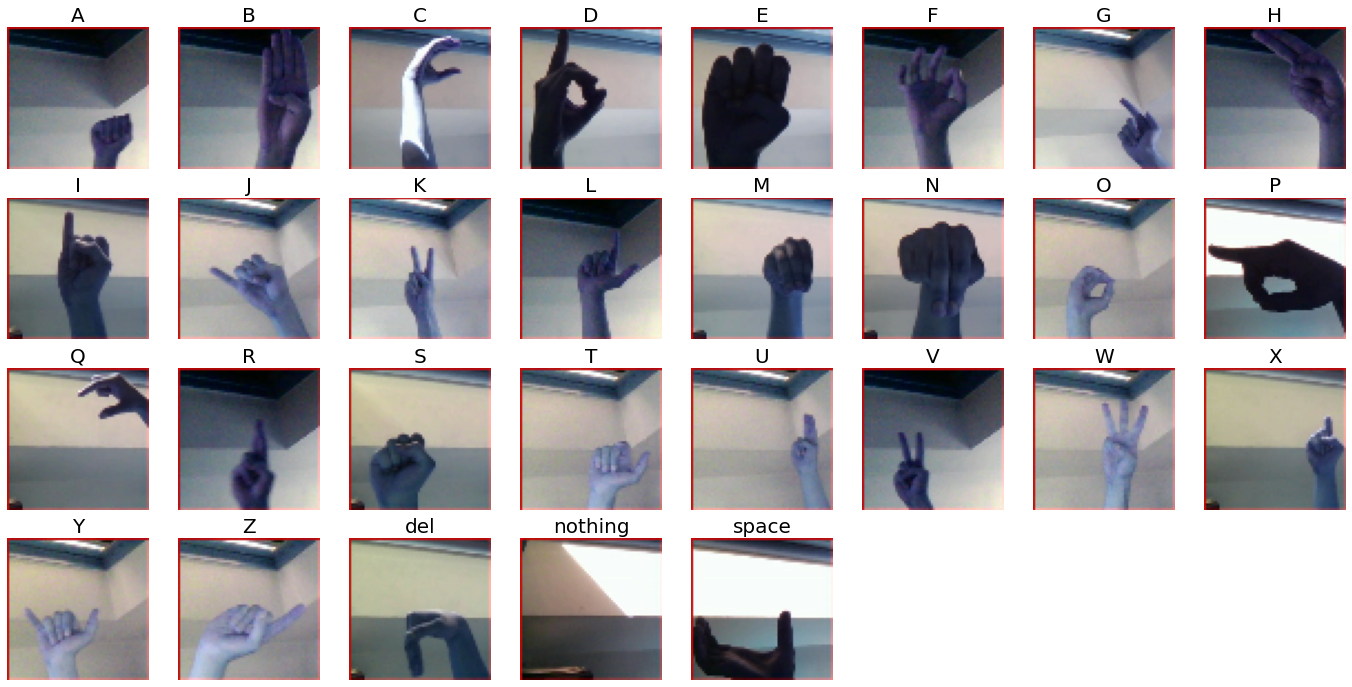

In [8]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


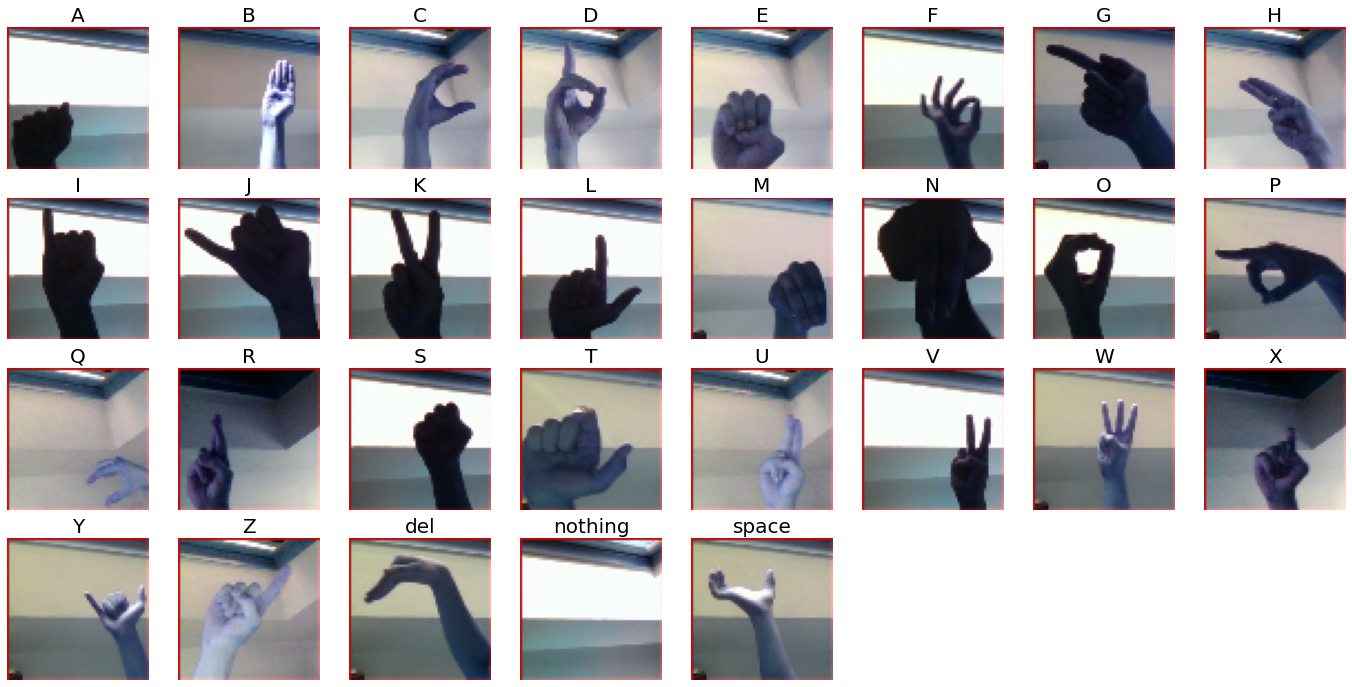

In [12]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [14]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [15]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)        

In [16]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(29, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 256)        

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
69600/69600 [==============================] - 3614s 52ms/step - loss: 1.5108 - accuracy: 0.5495
Epoch 2/5
69600/69600 [==============================] - 3499s 50ms/step - loss: 0.2121 - accuracy: 0.9304
Epoch 3/5
69600/69600 [==============================] - 3439s 49ms/step - loss: 0.1274 - accuracy: 0.9618
Epoch 4/5
69600/69600 [==============================] - 3433s 49ms/step - loss: 0.1024 - accuracy: 0.9703
Epoch 5/5
69600/69600 [==============================] - 3446s 50ms/step - loss: 0.1032 - accuracy: 0.9734


In [18]:
import mlflow
import mlflow.keras
#from sklearn.metrics import confusion_matrix
import matplotlib

mlflow.end_run()
with mlflow.start_run(run_name = 'Sequential'):
    tmodel = model
    tmodel.fit(X_train, y_train, epochs = 5, batch_size = 64)
    
    pred = tmodel.predict(X_test)
    
    mlflow.log_param("hidden_layers", args.hidden_layers)
    mlflow.log_param("output", args.output)
    mlflow.log_param("epochs", args.epochs)
    mlflow.log_param("loss_function", args.loss)
            # log metrics
    mlflow.log_metric("binary_loss", ktrain_cls.get_binary_loss(history))
    mlflow.log_metric("binary_acc",  ktrain_cls.get_binary_acc(history))
    mlflow.log_metric("validation_loss", ktrain_cls.get_binary_loss(history))
    mlflow.log_metric("validation_acc", ktrain_cls.get_validation_acc(history))
    mlflow.log_metric("average_loss", results[0])
    mlflow.log_metric("average_acc", results[1])

            # log artifacts (matplotlib images for loss/accuracy)
    mlflow.log_artifacts(image_dir)
          #log model
    mlflow.keras.log_model(tmodel, model_dir) 
  



Epoch 1/1
  576/69600 [..............................] - ETA: 1:04:01 - loss: 3.6078 - accuracy: 0.0365

KeyboardInterrupt: 

In [32]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for test images: 99.776 %


In [33]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

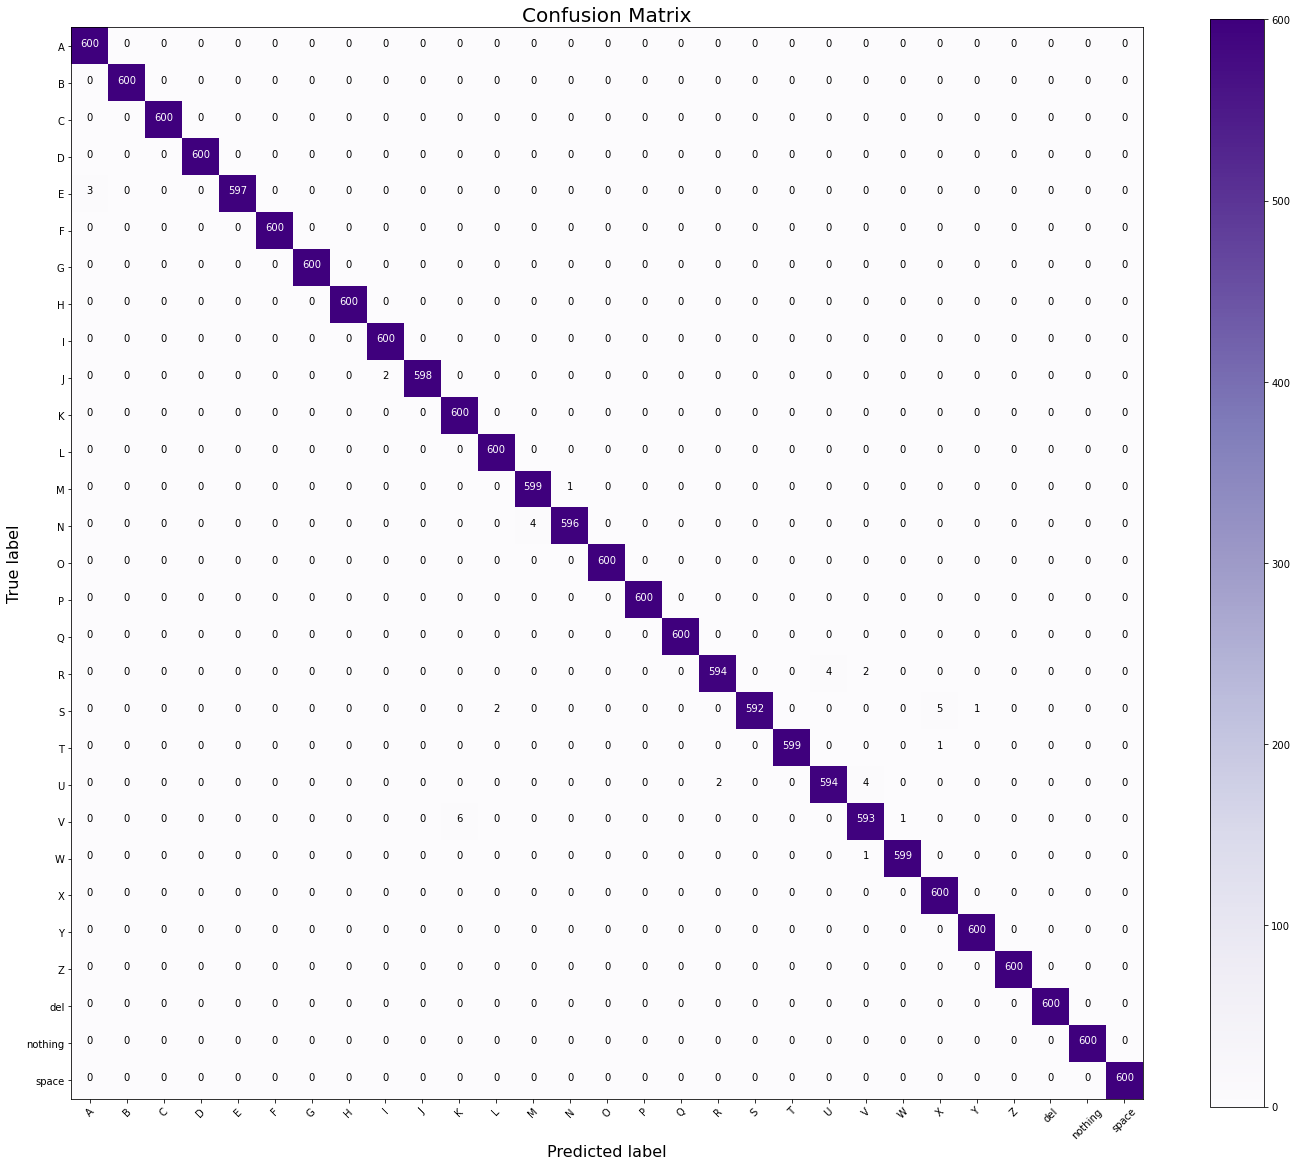

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)